### Install Package in Jupyter Notebook

Use this command-line in jupyter to install package

conda install matplotlib <br>
conda install numpy <br>
conda install pandas <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ignore the FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Read Dataset
this data can you access in this link : <br>
https://drive.google.com/file/d/195dW8uEP4JkhQFxgR-LbtYApZXCAdMeq/view?usp=share_link

In [2]:
df = pd.read_csv("D:\Imam\Belajar\Python\Data_Science\Bakery\Bakery sales.csv", sep =',')

In [3]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [5]:
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [6]:
df.rename(
    columns = {'date' : 'Date', 'time' : 'Time', 'ticket_number' : 'Ticket_Number', 'article' : 'Article', 'unit_price' : 'Unit_Price'}, 
    inplace = True)

In [7]:
df.head()

,Date,Time,Ticket_Number,Article,Quantity,Unit_Price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


### Data Exploration

In [8]:
#See the type of data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           234005 non-null  object 
 1   Time           234005 non-null  object 
 2   Ticket_Number  234005 non-null  float64
 3   Article        234005 non-null  object 
 4   Quantity       234005 non-null  float64
 5   Unit_Price     234005 non-null  object 
dtypes: float64(2), object(4)
memory usage: 10.7+ MB


In [9]:
#Convert 'Date' type from object to datetime to access the month and day in date
df['Date']  = pd.to_datetime(df['Date'])
#Convert 'Time' type from object to datetime to access the hour and minute in time
df['Time']  = pd.to_datetime(df['Time'])

In [10]:
#See the data info after change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           234005 non-null  datetime64[ns]
 1   Time           234005 non-null  datetime64[ns]
 2   Ticket_Number  234005 non-null  float64       
 3   Article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   Unit_Price     234005 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 10.7+ MB


In [11]:
#Extract the month and day from data date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#Extract the hour and minute from data time
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

In [12]:
#See the change
df.head()

,Date,Time,Ticket_Number,Article,Quantity,Unit_Price,Month,Day,Hour,Minute
0,2021-01-02,2023-04-17 08:38:00,150040.0,BAGUETTE,1.0,"0,90 €",1,2,8,38
1,2021-01-02,2023-04-17 08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1,2,8,38
2,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1,2,9,14
3,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN,1.0,"1,15 €",1,2,9,14
4,2021-01-02,2023-04-17 09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1,2,9,25


In [13]:
df.describe()

,Ticket_Number,Quantity,Month,Day,Hour,Minute
count,234005.000000,234005.000000,234005.000000,234005.000000,234005.000000,234005.000000
mean,219201.258738,1.538377,6.240862,16.014876,11.072037,29.692348
std,40053.223896,1.289603,2.800774,8.763694,2.774393,17.359653
min,150040.000000,-200.000000,1.000000,1.000000,7.000000,0.000000
25%,184754.000000,1.000000,4.000000,9.000000,9.000000,15.000000
50%,218807.000000,1.000000,7.000000,16.000000,11.000000,30.000000
75%,253927.000000,2.000000,8.000000,24.000000,12.000000,45.000000
max,288913.000000,200.000000,12.000000,31.000000,20.000000,59.000000


In [14]:
#Show the column and rows from data
df.shape

(234005, 10)

In [15]:
#Show the sum data null from column
df.isnull().sum()

Date             0
Time             0
Ticket_Number    0
Article          0
Quantity         0
Unit_Price       0
Month            0
Day              0
Hour             0
Minute           0
dtype: int64

In [16]:
#Show the sum data Nan from column
df.isna().sum()

Date             0
Time             0
Ticket_Number    0
Article          0
Quantity         0
Unit_Price       0
Month            0
Day              0
Hour             0
Minute           0
dtype: int64

### Change Unit_price to price

From df.info() the Unit_price type is object, and have a symbol €, thats cannot convert to a float <br>
So, the first change the Unit_price from to float, example : 0,90 € to 0.90

In [17]:
# Get first index in Unit_price with separator ' ' (a Space)
df['Price'] = df['Unit_Price'].apply(lambda x : x.split(' ')[0])

In [18]:
df.head()

,Date,Time,Ticket_Number,Article,Quantity,Unit_Price,Month,Day,Hour,Minute,Price
0,2021-01-02,2023-04-17 08:38:00,150040.0,BAGUETTE,1.0,"0,90 €",1,2,8,38,"0,90"
1,2021-01-02,2023-04-17 08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1,2,8,38,"1,20"
2,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1,2,9,14,"1,20"
3,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN,1.0,"1,15 €",1,2,9,14,"1,15"
4,2021-01-02,2023-04-17 09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1,2,9,25,"1,20"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           234005 non-null  datetime64[ns]
 1   Time           234005 non-null  datetime64[ns]
 2   Ticket_Number  234005 non-null  float64       
 3   Article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   Unit_Price     234005 non-null  object        
 6   Month          234005 non-null  int64         
 7   Day            234005 non-null  int64         
 8   Hour           234005 non-null  int64         
 9   Minute         234005 non-null  int64         
 10  Price          234005 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 19.6+ MB


In [20]:
# COnvert ',' in price to '.' to make it can convert to float
df['Price'] = df['Price'].str.replace(',', '.')

In [21]:
df.head()

,Date,Time,Ticket_Number,Article,Quantity,Unit_Price,Month,Day,Hour,Minute,Price
0,2021-01-02,2023-04-17 08:38:00,150040.0,BAGUETTE,1.0,"0,90 €",1,2,8,38,0.90
1,2021-01-02,2023-04-17 08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1,2,8,38,1.20
2,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1,2,9,14,1.20
3,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN,1.0,"1,15 €",1,2,9,14,1.15
4,2021-01-02,2023-04-17 09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1,2,9,25,1.20


In [22]:
#Convert data price from object to float
df['Price'] = df['Price'].astype('float')

In [23]:
df.head()

,Date,Time,Ticket_Number,Article,Quantity,Unit_Price,Month,Day,Hour,Minute,Price
0,2021-01-02,2023-04-17 08:38:00,150040.0,BAGUETTE,1.0,"0,90 €",1,2,8,38,0.90
1,2021-01-02,2023-04-17 08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1,2,8,38,1.20
2,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1,2,9,14,1.20
3,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN,1.0,"1,15 €",1,2,9,14,1.15
4,2021-01-02,2023-04-17 09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1,2,9,25,1.20


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           234005 non-null  datetime64[ns]
 1   Time           234005 non-null  datetime64[ns]
 2   Ticket_Number  234005 non-null  float64       
 3   Article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   Unit_Price     234005 non-null  object        
 6   Month          234005 non-null  int64         
 7   Day            234005 non-null  int64         
 8   Hour           234005 non-null  int64         
 9   Minute         234005 non-null  int64         
 10  Price          234005 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 19.6+ MB


In [25]:
# Create a new column 'Total_Price' with the multiplied the number and price
df['Total_Price'] = df['Quantity'] * df['Price']

In [26]:
df.head()

,Date,Time,Ticket_Number,Article,Quantity,Unit_Price,Month,Day,Hour,Minute,Price,Total_Price
0,2021-01-02,2023-04-17 08:38:00,150040.0,BAGUETTE,1.0,"0,90 €",1,2,8,38,0.90,0.90
1,2021-01-02,2023-04-17 08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1,2,8,38,1.20,3.60
2,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1,2,9,14,1.20,2.40
3,2021-01-02,2023-04-17 09:14:00,150041.0,PAIN,1.0,"1,15 €",1,2,9,14,1.15,1.15
4,2021-01-02,2023-04-17 09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1,2,9,25,1.20,6.00


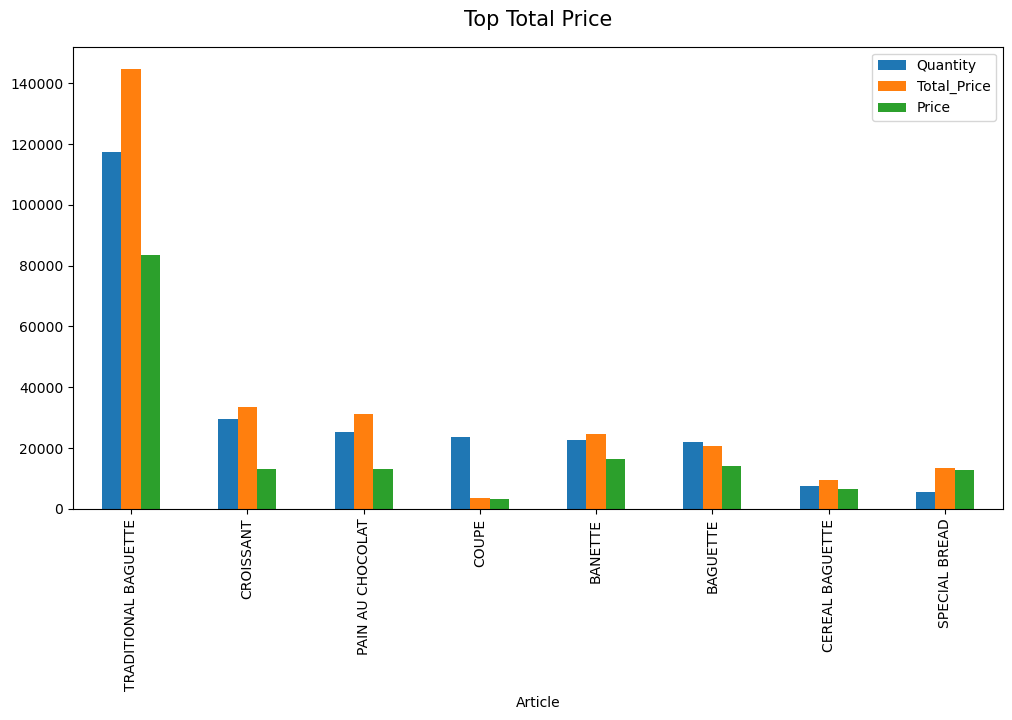

In [27]:
df_Quantity = df[['Article', 'Quantity', 'Total_Price', 'Price']].groupby('Article').sum().sort_values('Quantity', ascending = False)
df_Quantity.head(8).plot(kind = 'bar', figsize = (12,6))
plt.title('Top Total Price', size = 15, pad =15)
plt.show()

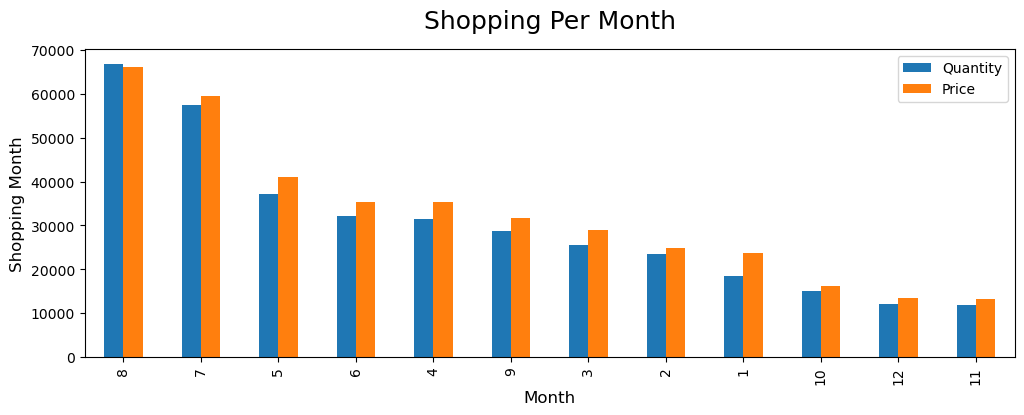

In [28]:
df_Day = df[['Month', 'Quantity', 'Price']].groupby('Month').sum().sort_values('Quantity', ascending = False)
df_Day.plot(kind = 'bar', figsize = (12,4))
plt.xlabel('Month', size = 12)
plt.ylabel('Shopping Month', size = 12)
plt.title('Shopping Per Month', size = 18, pad = 15)
plt.show()

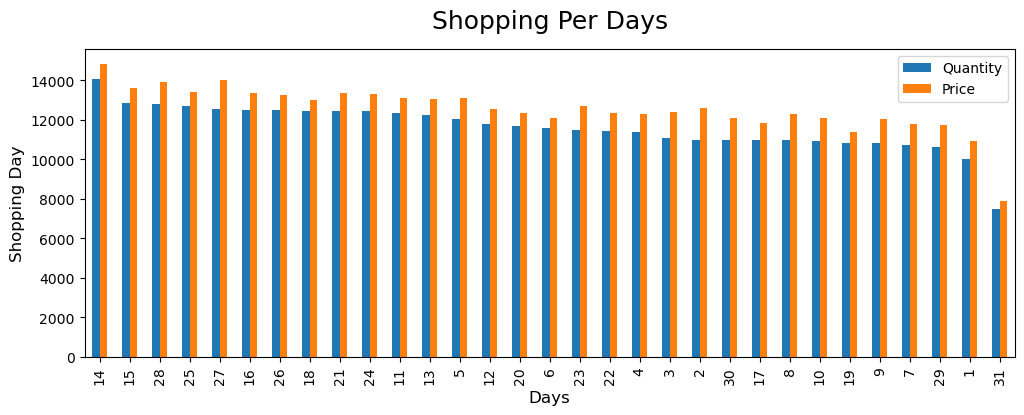

In [29]:
df_Day = df[['Day', 'Quantity', 'Price']].groupby('Day').sum().sort_values('Quantity', ascending = False)
df_Day.plot(kind = 'bar', figsize = (12,4))
plt.xlabel('Days', size = 12)
plt.ylabel('Shopping Day', size = 12)
plt.title('Shopping Per Days', size = 18, pad = 15)
plt.show()

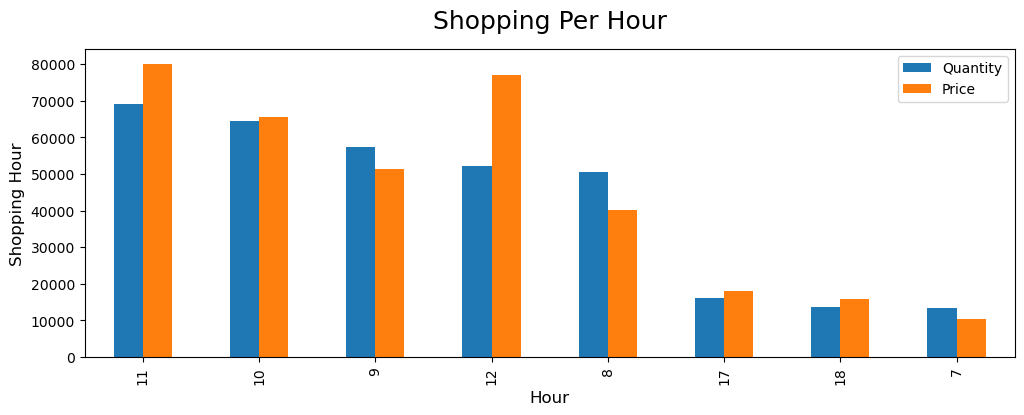

In [30]:
df_Hour = df[['Hour', 'Quantity', 'Price']].groupby('Hour').sum().sort_values('Quantity', ascending = False).head(8)
df_Hour.plot(kind = 'bar', figsize = (12,4))
plt.xlabel('Hour', size = 12)
plt.ylabel('Shopping Hour', size = 12)
plt.title('Shopping Per Hour', size = 18, pad = 15)
plt.show()